In [1]:
import cv2
import math
import csv
import os
import matplotlib.pyplot as plt
import ultralytics
from ultralytics import YOLO
from PIL import Image, ImageDraw, ImageFont
from ultralytics.solutions.solutions import BaseSolution
from ultralytics.utils.plotting import Annotator, colors
import time 
%matplotlib inline

https://www.digitalocean.com/community/tutorials/what-is-new-with-yolo

## EJERCICIO 1 
Vamos a usar el modleo YOLOv11 para detectar objetos en una imagen (en este caso vamos a aplicar el modelo directamente sin entrenarlo).
Vamos a aplicarlo en las imagenes deteccion_objetos.jpg y bus.jpg

Partiendo de la imagen deteccion_objetos.jpg y bus.jpg.



In [ ]:
ruta_imgs = 'recursos/5_5/'
imgs_arr = [ruta_imgs+"deteccion_objetos.jpg",ruta_imgs+"bus.jpg"]
# cargar modelo yolo11
model = YOLO("recursos/5_5/yolo/yolo11n.pt")   

results = model(imgs_arr)
for res in results:
    res.show()

## EJERCICIO 2

Vamos a repetir el ejercicio pero ahora vamos a modificar la salida para que quede de la siguiente forma:

![Imagen con la el resultado que se quiere obtener 1](recursos/5_5/deteccion_objetos_solucion.png)

![Imagen con la el resultado que se quiere obtener 1](recursos/5_5/bus_solucion.png)

Además sólo quiero que detecte los objetos cuya probabilidad sea mayor al 50%.

Ten en cuenta que al aplicar el modelo a una imagen devuelve diferentes datos:
 * Cajas:
    * Clase (cls)
    * Probabilidad (score)
    * Coordenadas de la caja xyxy

Para representar la imagen y añadir rectángulos, texto... puedes usar Image, ImageDraw, ImageFont de PIL. Dibujas la imagen con .Draw de (ImageDraw) con .rectangle y .text puedes ir añadiendo texto y rectángulos.

In [23]:
clases = results[0].names
colores = ['cyan','orange','pink','green','yellow','red','blue','white']
guia = {}

In [ ]:
for i,res in enumerate(results):    
    boxes = res.boxes  # Boxes object for bounding box outputs
    txt = ''
    filtrados = []
    for j,(cls,prob,coords) in enumerate(zip(boxes.cls,boxes.conf,boxes.xyxy)):
        if prob > 0.5:      # probabilidad mayor del 50%            
            # datos prediccion
            filtrados.append([cls,prob,coords])
            txt += 'Recuadro {}--> Clase: {},\t Score: {},\t Caja: {}\n'.format(j, clases[int(cls)], prob, coords)
            if int(cls) not in guia.keys(): 
                print(len(guia.keys()))
                guia[int(cls)] = colores[len(guia.keys())]
    # imagen
    img = Image.open(imgs_arr[i])
    draw = ImageDraw.Draw(img)
    font = ImageFont.truetype("usr/share/fonts/truetype/ubuntu/Ubuntu-B.ttf", size=30)

    for i,caso in enumerate(filtrados):
        coords = caso[2]
        color = guia[int(caso[0])]
        draw.rectangle([coords[0], coords[1], coords[2], coords[3]], outline=color, width=5)
        draw.rectangle([coords[0], coords[1]-30, coords[0]+2 + 40, coords[1]],fill="black")
        draw.rectangle([coords[0]+2, coords[1]-28, coords[0] + 40, coords[1]-2],fill=color)
        draw.text((coords[0]+8, coords[1]-32), str(i), fill="black",font=font)

    # mostrar resultados
    plt.figure(figsize=(13,7))
    plt.imshow(img)
    plt.axis("off")
    plt.tight_layout()
    plt.show()
    print(txt)

In [ ]:
# chuleta atributos
""" for res in results:    
    boxes = res.boxes          # Boxes object for bounding box outputs
    masks = res.masks          # Masks object for segmentation masks outputs
    keypoints = res.keypoints          # Keypoints object for pose outputs
    probs = res.probs          # Probs object for classification outputs
    obb = res.obb            # Oriented boxes object for OBB outputs
    res.show()              # display to screen
    res.save(filename="result.jpg")          # save to disk
    print(boxes.cls)
    print(boxes.conf) """

## EJERCICIO 3
YOLOv11 también sirve para segmentación, aplica segmentación a las dos imágenes con las que estamos trabajando

In [ ]:
#segmentation  
model = YOLO('recursos/5_5/yolo/yolo11n-seg.pt')  
results = model(imgs_arr)  
for res in results:
    res.show()


## EJERCICIO 4
De manera similar, podemos hacer la estimación de pose. Hazlo con las imágenes con las que estamos trabajando.

In [ ]:
model = YOLO('recursos/5_5/yolo/yolo11n-pose.pt')  
results = model(imgs_arr)  
for res in results:
    res.show()

## EJERCICIO 5

Haz lo que se hace en el siguiente video:

https://www.youtube.com/watch?v=_YbEna8UNcU

Tienes parte del código en:

https://www.albertcoronado.com/2024/11/12/tutorial-yolo-11/

Para la parte fine tuning tienes que entrenar el modelo para que distina matrículas de coche, para entrenar el modelo utiliza el dataset que puedes descargar de:

https://universe.roboflow.com/parag-parmar-3qpin/car_license_plate-ypwmk/dataset/1

NOTA: HE CONSEGUIDO QUE FUNCIONE BIEN CV2 PERO ABRIENDO PRIMERO UNA IMAGEN:
```
img = cv2.imread('Datos/image3.jpg')
cv2.imshow("SAPA", img)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

In [ ]:
# camara
model = YOLO("recursos/5_5/yolo/yolo11x.pt")
cap = cv2.VideoCapture(0)

font = cv2.FONT_HERSHEY_SIMPLEX
fontScale = 0.7
color = (0, 250, 0)
thickness = 2

while True:
    success, img = cap.read()
    results = model( img, stream=True )

    for r in results:
        for box in r.boxes:
            x1, y1, x2, y2 = box.xyxy[0]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

            confidence = math.ceil((box.conf[0]*100))
            
            cv2.rectangle(img, ( x1, y1 ), ( x2, y2 ), color, 1)
            cv2.putText(img, r.names[ int( box.cls[0] ) ]+" "+str(confidence)+"%", [ x1+4, y1+25 ], font, fontScale, color, thickness)

    cv2.imshow('Webcam', img)

    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [ ]:
!yolo task=detect mode=train epochs=20 batch=10 model='yolo11s' data='/home/iabd/Escritorio/clase/iabd/ia/sapa/deep_learning/recursos/datasets/car_license_plate.v1i.yolov11/data.yaml' 


In [ ]:
# predecir
!yolo predict model='yolo11s' source='/home/iabd/Escritorio/clase/iabd/ia/sapa/deep_learning/recursos/5_5/matriculas.jpeg'

## EJERCICIO 6
Repite el fine tuning del apartado anterior pero ahora en vez de como un comando en la terminal con código de python

In [ ]:
# rutas
model_matriculas = YOLO('yolo11s')
data_yaml='/home/iabd/Escritorio/clase/iabd/ia/sapa/deep_learning/recursos/datasets/car_license_plate.v1i.yolov11/data.yaml' 

# entrenar
model_matriculas.train(data = data_yaml,
            epochs= 25, 
            batch=10)

In [ ]:
# predecir
results = model_matriculas.predict('./recursos/5_5/matriculas.jpeg', conf=0.25)
for res in results:
    res.show()

In [ ]:
model_matriculas.save('./recursos/5_5/yolo/yolo_matriculas.pt')    # guardar modelo

## EJERCICIO 7
Vamos a contar los pasajeros de un autobus.

Sigue las instrucciones del siguiente video:

https://www.youtube.com/watch?v=hTI0Aj__SLE

ELIMINA LOS COMENTARIOS QUE HAY EN EL CÓDIGO Y COMENTA EL CÓDIGO CON TUS PROPIAS PALABRAS


In [32]:
from ultralytics.solutions.solutions import BaseSolution
from ultralytics.utils.plotting import Annotator, colors
import csv
from datetime import datetime
import os


class ObjectCounter(BaseSolution):
    """
        Clase para contar los objetos en un video.

        Extend: BaseSolution
        Atributos:
         - in_count (int): Contador de objetos que entran.
         - out_count (int): Contador de objetos que salen.
         - counted_ids (List[int]): Lista de IDs de objetos contados.
         - saved_ids (List[int]): Lista de IDs guardados en un archivo CSV.
         - classwise_counts (Dict[str, Dict[str, int]]): Diccionario de conteos, categorizados por clase de objeto.
         - region_initialized (bool): Indica si se ha inicializado la región de conteo en la imagen.
         - show_in (bool): Controla la visualización del conteo de entrada.
         - show_out (bool): Controla la visualización del conteo de salida.
    """

    def __init__(self, **kwargs):
        """Constructor de la clase."""
        super().__init__(**kwargs)

        self.in_count = 0    
        self.out_count = 0    
        self.counted_ids = []    
        self.saved_ids = []    
        self.classwise_counts = {}     
        self.region_initialized = False    

        self.show_in = self.CFG.get("show_in", True)
        self.show_out = self.CFG.get("show_out", True)

    def save_label_to_csv(self, track_id, label, action):
        """ Guarda en un archivo CSV los datos ['track_id', 'label', 'action', 'date', 'time'] """
        if track_id in self.saved_ids:
            return  # Si el ID ya está registrado, se omite

        # Obtener la fecha y hora actual
        current_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        current_date = datetime.now().strftime("%Y-%m-%d")  

        # Crear el archivo CSV con la fecha en el nombre
        filename = f'./recursos/5_5/tracked_objects_{current_date}.csv'

        # Comprobar si el archivo ya existe
        file_exists = os.path.isfile(filename)

        with open(filename, mode='a', newline='') as file:
            writer = csv.writer(file)

            # Escribir la cabecera si el archivo es nuevo
            if not file_exists:
                writer.writerow(['track_id', 'label', 'action', 'date', 'time'])

            # Escribir una nueva línea con los datos
            writer.writerow([track_id, label, action, current_time.split()[0], current_time.split()[1]])
            self.saved_ids.append(track_id)  # Guardar el ID en la lista de guardados

    def count_objects(self, current_centroid, track_id, prev_position, cls):
        """
        Cuenta objetos en función de un área o línea de referencia.

        Parámetros:
         - current_centroid (Tuple[float, float]): Coordenadas del centroide en el fotograma actual.
         - track_id (int): Identificador único del objeto rastreado.
         - prev_position (Tuple[float, float]): Coordenadas de la posición en el fotograma anterior (x, y).
         - cls (int): Índice de clase del objeto, utilizado para actualizar el conteo por clase.
        """
        if prev_position is None or track_id in self.counted_ids:
            return

        action = None  

        if len(self.region) == 2:  # Región lineal (definida como un segmento de línea)
            line = self.LineString(self.region)
            if line.intersects(self.LineString([prev_position, current_centroid])):
                if abs(self.region[0][0] - self.region[1][0]) < abs(self.region[0][1] - self.region[1][1]):
                    if current_centroid[0] > prev_position[0]:  # Movimiento hacia la derecha
                        self.in_count += 1
                        self.classwise_counts[self.names[cls]]["IN"] += 1
                        action = "IN"
                    else:  # Movimiento hacia la izquierda
                        self.out_count += 1
                        self.classwise_counts[self.names[cls]]["OUT"] += 1
                        action = "OUT"
                else:
                    if current_centroid[1] > prev_position[1]:  # Movimiento hacia abajo
                        self.in_count += 1
                        self.classwise_counts[self.names[cls]]["IN"] += 1
                        action = "IN"
                    else:  # Movimiento hacia arriba
                        self.out_count += 1
                        self.classwise_counts[self.names[cls]]["OUT"] += 1
                        action = "OUT"
                self.counted_ids.append(track_id)

        elif len(self.region) > 2:  # Región poligonal
            polygon = self.Polygon(self.region)
            if polygon.contains(self.Point(current_centroid)):
                region_width = max([p[0] for p in self.region]) - min([p[0] for p in self.region])
                region_height = max([p[1] for p in self.region]) - min([p[1] for p in self.region])

                if region_width < region_height:
                    if current_centroid[0] > prev_position[0]:  # Movimiento hacia la derecha
                        self.in_count += 1
                        self.classwise_counts[self.names[cls]]["IN"] += 1
                        action = "IN"
                    else:  # Movimiento hacia la izquierda
                        self.out_count += 1
                        self.classwise_counts[self.names[cls]]["OUT"] += 1
                        action = "OUT"
                else:
                    if current_centroid[1] > prev_position[1]:  # Movimiento hacia abajo
                        self.in_count += 1
                        self.classwise_counts[self.names[cls]]["IN"] += 1
                        action = "IN"
                    else:  # Movimiento hacia arriba
                        self.out_count += 1
                        self.classwise_counts[self.names[cls]]["OUT"] += 1
                        action = "OUT"
                self.counted_ids.append(track_id)

        # Guardar la etiqueta con la acción realizada
        if action:
            label = f"{self.names[cls]} ID: {track_id}"
            self.save_label_to_csv(track_id, label, action)

    def store_classwise_counts(self, cls):
        """Inicializa los conteos por clase si aún no existen."""
        if self.names[cls] not in self.classwise_counts:
            self.classwise_counts[self.names[cls]] = {"IN": 0, "OUT": 0}

    def display_counts(self, im0):
        """Muestra los conteos de objetos en la imagen de entrada."""
        labels_dict = {
            str.capitalize(key): f"{'IN ' + str(value['IN']) if self.show_in else ''} "
            f"{'OUT ' + str(value['OUT']) if self.show_out else ''}".strip()
            for key, value in self.classwise_counts.items()
            if value["IN"] != 0 or value["OUT"] != 0
        }

        if labels_dict:
            self.annotator.display_analytics(im0, labels_dict, (104, 31, 17), (255, 255, 255), 10)

        for track_id in self.track_ids:
            if track_id in self.counted_ids:
                in_count = self.in_count
                label = f"ID:{track_id} count at number {in_count}"
                self.annotator.box_label(self.boxes[self.track_ids.index(track_id)], label=label, color=(255, 255, 0))

    def count(self, im0):
        """Procesa los datos de entrada (fotogramas o rastros de objetos) y actualiza los conteos."""
        if not self.region_initialized:
            self.initialize_region()
            self.region_initialized = True

        self.annotator = Annotator(im0, line_width=self.line_width)
        self.extract_tracks(im0)
        self.annotator.draw_region(reg_pts=self.region, color=(104, 0, 123), thickness=self.line_width * 2)

        for box, track_id, cls in zip(self.boxes, self.track_ids, self.clss):
            self.store_tracking_history(track_id, box)
            self.store_classwise_counts(cls)

            label = f"{self.names[cls]} ID: {track_id}"
            self.annotator.box_label(box, label=label, color=colors(cls, True))

            current_centroid = ((box[0] + box[2]) / 2, (box[1] + box[3]) / 2)
            prev_position = self.track_history[track_id][-2] if len(self.track_history[track_id]) > 1 else None
            self.count_objects(current_centroid, track_id, prev_position, cls)

        self.display_counts(im0)
        self.display_output(im0)

        return im0


In [ ]:
# Definir la función de callback del mouse
def RGB(event, x, y, flags, param):
    if event == cv2.EVENT_MOUSEMOVE:  # Verificar el movimiento del mouse
        point = [x, y]
        print(f"El mouse se movió a: {point}") 

# Abrir el archivo de video
cap = cv2.VideoCapture('/home/iabd/Escritorio/clase/iabd/ia/sapa/deep_learning/recursos/5_5/1.mp4')

# Definir los puntos de la región para el conteo
region_points = [(386,103), (458, 499)]

# Inicializar el contador de objetos
counter = ObjectCounter(
    region = region_points,  # Pasar los puntos de la región
    model = "yolo11s.pt",  
    classes = [0],  # clase "persona"
    show_in = True,  # conteo de entradas
    show_out = True,  # conteo de salidas
    line_width = 2,  #  grosor de la línea 
)

# Crear ventana y establecer función callback del mouse
cv2.namedWindow('RGB')
cv2.setMouseCallback('RGB', RGB)

count = 0

while True:
    # Leer un fotograma del video
    ret, frame = cap.read()
    if not ret:
        break
        # Si el video termina, reiniciar desde el principio
#        cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
#        continue
    count += 1
    if count % 2 != 0:  # Omitir fotogramas impares
        continue

    frame = cv2.resize(frame, (1020, 500))

    # Procesar el fotograma con el contador de objetos
    frame = counter.count(frame)

    # Mostrar el fotograma
    cv2.imshow("RGB", frame)
    if cv2.waitKey(1) & 0xFF == ord("q"):  # Presionar 'q' para salir
        break

# Liberar el objeto de captura de video y cerrar la ventana de visualización
cap.release()
cv2.destroyAllWindows()


## EJERCICIO 8
Adapta el código anterior para que cuente vehículos en el video vehicle-counting.mp4 (tiene que contar por separado coches y camiones)

In [6]:
from ultralytics.solutions.solutions import BaseSolution
from ultralytics.utils.plotting import Annotator, colors
import csv
from datetime import datetime
import os


class ObjectCounter(BaseSolution):
    """
        Clase para contar los objetos en un video.

        Extend: BaseSolution
        Atributos:
         - in_count (int): Contador de objetos que entran.
         - out_count (int): Contador de objetos que salen.
         - counted_ids (List[int]): Lista de IDs de objetos contados.
         - saved_ids (List[int]): Lista de IDs guardados en un archivo CSV.
         - classwise_counts (Dict[str, Dict[str, int]]): Diccionario de conteos, categorizados por clase de objeto.
         - region_initialized (bool): Indica si se ha inicializado la región de conteo en la imagen.
         - show_in (bool): Controla la visualización del conteo de entrada.
         - show_out (bool): Controla la visualización del conteo de salida.
         - csv_ruta (str): ruta del csv         ### CAMBIO
    """

    def __init__(self, ruta, **kwargs):         ### CAMBIO
        """Constructor de la clase."""
        super().__init__(**kwargs)

        self.in_count = 0    
        self.out_count = 0    
        self.counted_ids = []    
        self.saved_ids = []    
        self.classwise_counts = {}     
        self.region_initialized = False    
        self.csv_ruta = ruta         ### CAMBIO

        self.show_in = self.CFG.get("show_in", True)
        self.show_out = self.CFG.get("show_out", True)

    def save_label_to_csv(self, track_id, label, action):
        """ Guarda en un archivo CSV los datos ['track_id', 'label', 'action', 'date', 'time'] """
        if track_id in self.saved_ids:
            return  # Si el ID ya está registrado, se omite

        # Obtener la fecha y hora actual
        current_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        current_date = datetime.now().strftime("%Y-%m-%d")  

        # Crear el archivo CSV con la fecha en el nombre
        filename = self.csv_ruta+current_date+'.csv'    ### CAMBIO

        # Comprobar si el archivo ya existe
        file_exists = os.path.isfile(filename)

        with open(filename, mode='a', newline='') as file:
            writer = csv.writer(file)

            # Escribir la cabecera si el archivo es nuevo
            if not file_exists:
                writer.writerow(['track_id', 'label', 'action', 'date', 'time'])

            # Escribir una nueva línea con los datos
            writer.writerow([track_id, label, action, current_time.split()[0], current_time.split()[1]])
            self.saved_ids.append(track_id)  # Guardar el ID en la lista de guardados

    def count_objects(self, current_centroid, track_id, prev_position, cls):
        """
        Cuenta objetos en función de un área o línea de referencia.

        Parámetros:
         - current_centroid (Tuple[float, float]): Coordenadas del centroide en el fotograma actual.
         - track_id (int): Identificador único del objeto rastreado.
         - prev_position (Tuple[float, float]): Coordenadas de la posición en el fotograma anterior (x, y).
         - cls (int): Índice de clase del objeto, utilizado para actualizar el conteo por clase.
        """
        if prev_position is None or track_id in self.counted_ids:
            return

        action = None  

        if len(self.region) == 2:  # Región lineal (definida como un segmento de línea)
            line = self.LineString(self.region)
            if line.intersects(self.LineString([prev_position, current_centroid])):
                if abs(self.region[0][0] - self.region[1][0]) < abs(self.region[0][1] - self.region[1][1]):
                    if current_centroid[0] > prev_position[0]:  # Movimiento hacia la derecha
                        self.in_count += 1
                        self.classwise_counts[self.names[cls]]["IN"] += 1
                        action = "IN"
                    else:  # Movimiento hacia la izquierda
                        self.out_count += 1
                        self.classwise_counts[self.names[cls]]["OUT"] += 1
                        action = "OUT"
                else:
                    if current_centroid[1] > prev_position[1]:  # Movimiento hacia abajo
                        self.in_count += 1
                        self.classwise_counts[self.names[cls]]["IN"] += 1
                        action = "IN"
                    else:  # Movimiento hacia arriba
                        self.out_count += 1
                        self.classwise_counts[self.names[cls]]["OUT"] += 1
                        action = "OUT"
                self.counted_ids.append(track_id)

        elif len(self.region) > 2:  # Región poligonal
            polygon = self.Polygon(self.region)
            if polygon.contains(self.Point(current_centroid)):
                region_width = max([p[0] for p in self.region]) - min([p[0] for p in self.region])
                region_height = max([p[1] for p in self.region]) - min([p[1] for p in self.region])

                if region_width < region_height:
                    if current_centroid[0] > prev_position[0]:  # Movimiento hacia la derecha
                        self.in_count += 1
                        self.classwise_counts[self.names[cls]]["IN"] += 1
                        action = "IN"
                    else:  # Movimiento hacia la izquierda
                        self.out_count += 1
                        self.classwise_counts[self.names[cls]]["OUT"] += 1
                        action = "OUT"
                else:
                    if current_centroid[1] > prev_position[1]:  # Movimiento hacia abajo
                        self.in_count += 1
                        self.classwise_counts[self.names[cls]]["IN"] += 1
                        action = "IN"
                    else:  # Movimiento hacia arriba
                        self.out_count += 1
                        self.classwise_counts[self.names[cls]]["OUT"] += 1
                        action = "OUT"
                self.counted_ids.append(track_id)

        # Guardar la etiqueta con la acción realizada
        if action:
            label = f"{self.names[cls]} ID: {track_id}"
            self.save_label_to_csv(track_id, label, action)

    def store_classwise_counts(self, cls):
        """Inicializa los conteos por clase si aún no existen."""
        if self.names[cls] not in self.classwise_counts:
            self.classwise_counts[self.names[cls]] = {"IN": 0, "OUT": 0}

    def display_counts(self, im0):
        """Muestra los conteos de objetos en la imagen de entrada."""
        labels_dict = {
            str.capitalize(key): f"{'IN ' + str(value['IN']) if self.show_in else ''} "
            f"{'OUT ' + str(value['OUT']) if self.show_out else ''}".strip()
            for key, value in self.classwise_counts.items()
            if value["IN"] != 0 or value["OUT"] != 0
        }

        if labels_dict:
            self.annotator.display_analytics(im0, labels_dict, (104, 31, 17), (255, 255, 255), 10)

        for track_id in self.track_ids:
            if track_id in self.counted_ids:
                in_count = self.in_count
                label = f"ID:{track_id} count at number {in_count}"
                self.annotator.box_label(self.boxes[self.track_ids.index(track_id)], label=label, color=(255, 255, 0))

    def count(self, im0):
        """Procesa los datos de entrada (fotogramas o rastros de objetos) y actualiza los conteos."""
        if not self.region_initialized:
            self.initialize_region()
            self.region_initialized = True

        self.annotator = Annotator(im0, line_width=self.line_width)
        self.extract_tracks(im0)
        self.annotator.draw_region(reg_pts=self.region, color=(104, 0, 123), thickness=self.line_width * 2)

        for box, track_id, cls in zip(self.boxes, self.track_ids, self.clss):
            self.store_tracking_history(track_id, box)
            self.store_classwise_counts(cls)

            label = f"{self.names[cls]} ID: {track_id}"
            self.annotator.box_label(box, label=label, color=colors(cls, True))

            current_centroid = ((box[0] + box[2]) / 2, (box[1] + box[3]) / 2)
            prev_position = self.track_history[track_id][-2] if len(self.track_history[track_id]) > 1 else None
            self.count_objects(current_centroid, track_id, prev_position, cls)

        self.display_counts(im0)
        self.display_output(im0)

        return im0


In [ ]:
# Definir la función de callback del mouse
def RGB(event, x, y, flags, param):
    if event == cv2.EVENT_MOUSEMOVE:  # Verificar el movimiento del mouse
        point = [x, y]
        print(f"El mouse se movió a: {point}") 

# Abrir el archivo de video
cap = cv2.VideoCapture('./recursos/5_5/vehicle-counting.mp4')   ### CAMBIO

# Definir los puntos de la región para el conteo
region_points = [(20,280), (1000, 280)]

# Inicializar el contador de objetos
counter = ObjectCounter(
    ruta = './recursos/5_5/tracked_objects_autopista_',
    region=region_points,  # Pasar los puntos de la región
    model="./recursos/5_5/yolo/yolo11s.pt",  
    classes=[2,7],  # Detectar clases 2 car, 7 truk       ### CAMBIO
    show_in=True,  # conteo de entradas
    show_out=True,  # conteo de salidas
    line_width=2,  # grosor de la línea 
)

# Crear ventana y establecer función callback del mouse
cv2.namedWindow('RGB')
cv2.setMouseCallback('RGB', RGB)

count = 0

while True:
    # Leer un fotograma del video
    ret, frame = cap.read()
    if not ret:
        break
        # Si el video termina, reiniciar desde el principio
#        cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
#        continue
    count += 1
    if count % 2 != 0:  # Omitir fotogramas impares
        continue

    frame = cv2.resize(frame, (1020, 500))

    # Procesar el fotograma con el contador de objetos
    frame = counter.count(frame)

    # Mostrar el fotograma
    cv2.imshow("RGB", frame)
    if cv2.waitKey(1) & 0xFF == ord("q"):  # Presionar 'q' para salir
        break

# Liberar el objeto de captura de video y cerrar la ventana de visualización
cap.release()
cv2.destroyAllWindows()


## EJERCICIO 9
Adapta el ejercicio anterior para que en vez de coches cuente matrículas usando el modelo que has creado en el ejercicio 6. 

Si el video del apartado anterior no te sirve porque no se ven bien las matrículas crea un video con la IA generativa (si el video creado es demasiado corto junta varios videos en uno)

In [ ]:
####  solo es necesario editar el segundo fichero

# Definir la función de callback del mouse
def RGB(event, x, y, flags, param):
    if event == cv2.EVENT_MOUSEMOVE:  # Verificar el movimiento del mouse
        point = [x, y]
        print(f"El mouse se movió a: {point}") 

# Abrir el archivo de video
cap = cv2.VideoCapture('./recursos/5_5/prueba.mp4')   ### CAMBIO

# Definir los puntos de la región para el conteo
region_points = [(400,20), (800, 460)]

# Inicializar el contador de objetos
counter = ObjectCounter(
    ruta = './recursos/5_5/tracked_objects_matriculas_',        ### CAMBIO
    region=region_points,  # Pasar los puntos de la región
    model='./recursos/5_5/yolo/yolo_matriculas.pt',  
    classes=[0],  # Detectar clases 
    show_in=True,  # conteo de entradas
    show_out=True,  # conteo de salidas
    line_width=2,  # grosor de la línea 
)

# Crear ventana y establecer función callback del mouse
cv2.namedWindow('RGB')
cv2.setMouseCallback('RGB', RGB)

count = 0

while True:
    # Leer un fotograma del video
    ret, frame = cap.read()
    if not ret:
        break
        # Si el video termina, reiniciar desde el principio
#        cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
#        continue
    count += 1
    if count % 2 != 0:  # Omitir fotogramas impares
        continue

    frame = cv2.resize(frame, (1020, 500))

    # Procesar el fotograma con el contador de objetos
    frame = counter.count(frame)

    # Mostrar el fotograma
    cv2.imshow("RGB", frame)
    if cv2.waitKey(1) & 0xFF == ord("q"):  # Presionar 'q' para salir
        break

# Liberar el objeto de captura de video y cerrar la ventana de visualización
cap.release()
cv2.destroyAllWindows()


## EJERCICIO 10
Vamos a hacer fine tuning sobre el modelo para segmentación SAM-2.

Puedes sacar información de la siguiente página:

https://blog.roboflow.com/fine-tune-sam-2-1/

A la hora de conseguir el dataset, descargalo para no tener problemas con la API-KEY de Roboflow

### Preparacion

In [3]:
# obtener dataset
!curl -L "https://universe.roboflow.com/ds/p1fYx5Kd9a?key=NAS33NVLPw" > roboflow.zip; unzip roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   901  100   901    0     0   3090      0 --:--:-- --:--:-- --:--:--  3096
100 4978k  100 4978k    0     0  2456k      0  0:00:02  0:00:02 --:--:-- 5458k
Archive:  roboflow.zip
replace README.dataset.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [ ]:
# NO ES NECESARIO, ya tengo el dataset

# !pip install roboflow

# from roboflow import Roboflow

# rf = Roboflow(api_key="W8Wh3vwPre13GJ9ArQue")
# project = rf.workspace("brad-dwyer").project("car-parts-pgo19")
# version = project.version(6)
# dataset = version.download("sam2")

# # rename dataset.location to "data"
# os.rename(dataset.location, "/home/iabd/Escritorio/IABD/IA/SAPA/Redes Neuronales/Ej_sam2/data")

In [2]:
# descargar sam2 (clonar repo) (ya esta hecho)
!git clone https://github.com/facebookresearch/sam2.git

Clonando en 'sam2'...
remote: Enumerating objects: 1070, done.
remote: Total 1070 (delta 0), reused 0 (delta 0), pack-reused 1070 (from 1)
Recibiendo objetos: 100% (1070/1070), 134.70 MiB | 11.09 MiB/s, listo.
Resolviendo deltas: 100% (376/376), listo.


In [3]:
# sam2 train.yaml
!wget -O ./sam2/sam2/configs/train.yaml 'https://drive.usercontent.google.com/download?id=11cmbxPPsYqFyWq87tmLgBAQ6OZgEhPG3'

--2025-02-11 15:18:05--  https://drive.usercontent.google.com/download?id=11cmbxPPsYqFyWq87tmLgBAQ6OZgEhPG3
Resolviendo drive.usercontent.google.com (drive.usercontent.google.com)... 216.58.215.161, 2a00:1450:4003:80c::2001
Conectando con drive.usercontent.google.com (drive.usercontent.google.com)[216.58.215.161]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 11055 (11K) [application/octet-stream]
Guardando como: ‘./sam2/sam2/configs/train.yaml’

./sam2/sam2/configs 100%[===================>]  10,80K  --.-KB/s    en 0s      

2025-02-11 15:18:08 (113 MB/s) - ‘./sam2/sam2/configs/train.yaml’ guardado [11055/11055]



In [4]:
# navigate to the sam2 directory and install the model as well as supervision
%cd ./sam2/

# ya esta instalado
!pip install -e .[dev]
!pip install supervision -q


/home/iabd/Escritorio/clase/iabd/ia/sapa/deep_learning/MalditoSam/sam2
Obtaining file:///home/iabd/Escritorio/clase/iabd/ia/sapa/deep_learning/MalditoSam/sam2
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for SAM-2 (pyproject.toml) ... done
  Created wheel for SAM-2: filename=SAM_2-1.0-0.editable-cp310-cp310-linux_x86_64.whl size=13838 sha256=c07ba12746faa1cc922f26e360dfb9ee36d067f1fa71c29463e63b62c9ba2701
  Stored in directory: /tmp/pip-ephem-wheel-cache-0p8hgqn3/wheels/b1/be/bd/a1bd34ec4c7909ec148583eb228a423cc53edf2ba5cac53142
Successfully built SAM-2
  Attempting uninstall: SAM-2
    Found existing installation: SAM-2 1.0
    Uninstalling SAM-2-1.0:
      Successfully uninstalled SAM-2-1.0


In [5]:
# download the checkpoints
!cd ./checkpoints && ./download_ckpts.sh

--2025-02-11 15:19:10--  https://dl.fbaipublicfiles.com/segment_anything_2/092824/sam2.1_hiera_tiny.pt
Resolviendo dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.154.41.96, 18.154.41.8, 18.154.41.57, ...
Conectando con dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)[18.154.41.96]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 156008466 (149M) [application/vnd.snesdev-page-table]
Guardando como: ‘sam2.1_hiera_tiny.pt’

sam2.1_hiera_tiny.p 100%[===================>] 148,78M  50,3MB/s    en 3,0s    

2025-02-11 15:19:14 (50,3 MB/s) - ‘sam2.1_hiera_tiny.pt’ guardado [156008466/156008466]

--2025-02-11 15:19:14--  https://dl.fbaipublicfiles.com/segment_anything_2/092824/sam2.1_hiera_small.pt
Resolviendo dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.154.41.8, 18.154.41.96, 18.154.41.12, ...
Conectando con dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)[18.154.41.8]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud

In [6]:
!ls

assets		    docker-compose.yaml  pyproject.toml    setup.py
backend.Dockerfile  INSTALL.md		 README.md	   tools
checkpoints	    LICENSE		 RELEASE_NOTES.md  training
CODE_OF_CONDUCT.md  LICENSE_cctorch	 sam2
CONTRIBUTING.md     MANIFEST.in		 SAM_2.egg-info
demo		    notebooks		 sav_dataset


In [7]:
""" 
# preparar dataset
import re

# FOLDER = "../train"
FOLDER = "./content/data/train"
for filename in os.listdir(FOLDER):
    # Replace all except last dot with underscore
    new_filename = filename.replace(".", "_", filename.count(".") - 1)
    if not re.search(r"_\d+\.\w+$", new_filename):
        # Add an int to the end of base name
        new_filename = new_filename.replace(".", "_1.")
    os.rename(os.path.join(FOLDER, filename), os.path.join(FOLDER, new_filename)) """

In [10]:
# preparar dataset
import re

rutas = ["/home/iabd/Escritorio/clase/Car Parts.v6i.sam2/train",
    "/home/iabd/Escritorio/clase/Car Parts.v6i.sam2/test",
    "/home/iabd/Escritorio/clase/Car Parts.v6i.sam2/valid"]

for carpeta in rutas:
    for filename in os.listdir(carpeta):
        # Replace all except last dot with underscore
        new_filename = filename.replace(".", "_", filename.count(".") - 1)
        if not re.search(r"_\d+\.\w+$", new_filename):
            # Add an int to the end of base name
            new_filename = new_filename.replace(".", "_1.")
        os.rename(os.path.join(carpeta, filename), os.path.join(carpeta, new_filename))

### Entrenamiento

In [7]:
!ls

assets		    docker-compose.yaml  pyproject.toml    setup.py
backend.Dockerfile  INSTALL.md		 README.md	   tools
checkpoints	    LICENSE		 RELEASE_NOTES.md  training
CODE_OF_CONDUCT.md  LICENSE_cctorch	 sam2
CONTRIBUTING.md     MANIFEST.in		 SAM_2.egg-info
demo		    notebooks		 sav_dataset


In [10]:
# !python3 -m pip install --upgrade 'optree>=0.13.0'

  Attempting uninstall: optree
    Found existing installation: optree 0.12.1
    Uninstalling optree-0.12.1:
      Successfully uninstalled optree-0.12.1


In [8]:
# estamos en la carpeta Ej_sam2/sam2
!python training/train.py -c 'configs/train.yaml' --use-cluster 0 --num-gpus 1

# model weights saved in: /sam2/sam2_logs/configs/train.yaml/checkpoints/checkpoint.pt

###################### Train App Config ####################
scratch:
  resolution: 1024
  train_batch_size: 1
  num_train_workers: 10
  num_frames: 1
  max_num_objects: 3
  base_lr: 5.0e-06
  vision_lr: 3.0e-06
  phases_per_epoch: 1
  num_epochs: 40
dataset:
  img_folder: /home/iabd/Escritorio/clase/Car Parts.v6i.sam2/train
  gt_folder: /home/iabd/Escritorio/clase/Car Parts.v6i.sam2/train
  multiplier: 2
vos:
  train_transforms:
  - _target_: training.dataset.transforms.ComposeAPI
    transforms:
    - _target_: training.dataset.transforms.RandomHorizontalFlip
      consistent_transform: true
    - _target_: training.dataset.transforms.RandomAffine
      degrees: 25
      shear: 20
      image_interpolation: bilinear
      consistent_transform: true
    - _target_: training.dataset.transforms.RandomResizeAPI
      sizes: ${scratch.resolution}
      square: true
      consistent_transform: true
    - _target_: training.dataset.transforms.ColorJitter
      consistent_transform: true
   

### Prediccion

In [10]:
!ls

assets		    docker-compose.yaml  pyproject.toml    sav_dataset
backend.Dockerfile  INSTALL.md		 README.md	   setup.py
checkpoints	    LICENSE		 RELEASE_NOTES.md  tools
CODE_OF_CONDUCT.md  LICENSE_cctorch	 sam2		   training
CONTRIBUTING.md     MANIFEST.in		 SAM_2.egg-info
demo		    notebooks		 sam2_logs


In [12]:
# ya esta instalado mas arriba
!pip install supervision    

import torch
from sam2.build_sam import build_sam2
from sam2.automatic_mask_generator import SAM2AutomaticMaskGenerator
import supervision as sv
import os
import random
from PIL import Image
import numpy as np

# use bfloat16 for inference
# from Meta notebook
torch.autocast("cuda", dtype=torch.bfloat16).__enter__()
if torch.cuda.get_device_properties(0).major >= 8:
	torch.backends.cuda.matmul.allow_tf32 = True
	torch.backends.cudnn.allow_tf32 = True

checkpoint = "sam2_logs/configs/train.yaml/checkpoints/checkpoint.pt"
model_cfg = "configs/sam2.1/sam2.1_hiera_b+.yaml"
sam2 = build_sam2(model_cfg, checkpoint, device="cuda")
mask_generator = SAM2AutomaticMaskGenerator(sam2)

checkpoint_base = "checkpoints/sam2.1_hiera_base_plus.pt"
model_cfg_base = "configs/sam2.1/sam2.1_hiera_b+.yaml"
sam2_base = build_sam2(model_cfg_base, checkpoint_base, device="cuda")
mask_generator_base = SAM2AutomaticMaskGenerator(sam2_base)

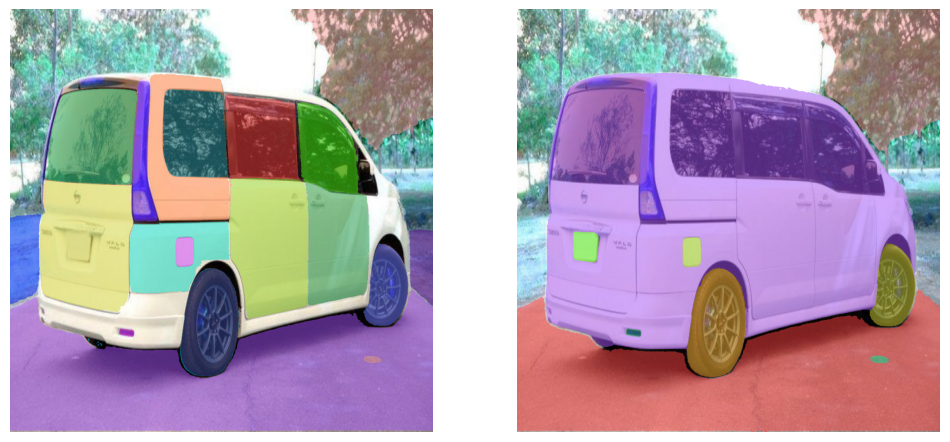

In [13]:

validation_set = os.listdir("/home/iabd/Escritorio/clase/Car Parts.v6i.sam2/valid")

# choose random with .json extension
image = random.choice([img for img in validation_set if img.endswith(".jpg")])
image = os.path.join("/home/iabd/Escritorio/clase/Car Parts.v6i.sam2/valid", image)
opened_image = np.array(Image.open(image).convert("RGB"))
result = mask_generator.generate(opened_image)

detections = sv.Detections.from_sam(sam_result=result)

mask_annotator = sv.MaskAnnotator(color_lookup = sv.ColorLookup.INDEX)
annotated_image = opened_image.copy()
annotated_image = mask_annotator.annotate(annotated_image, detections=detections)

base_annotator = sv.MaskAnnotator(color_lookup = sv.ColorLookup.INDEX)

base_result = mask_generator_base.generate(opened_image)
base_detections = sv.Detections.from_sam(sam_result=base_result)
base_annotated_image = opened_image.copy()
base_annotated_image = base_annotator.annotate(base_annotated_image, detections=base_detections)

sv.plot_images_grid(images=[annotated_image, base_annotated_image], grid_size=(1, 2))

## EJERCICIO 11 (OPCIONAL)
Haz fine tuning con sam2 o yolo11 para segmentación con otro dataset 

## EJERCICIO 12 (OPCIONAL)
En el siguiente enlace encontraras diferentes modelos y trabajos sobre la visión por computación, prueba alguno de ellos (algunos que no funcionan porque las librerías se han actualizado y tienes que adaptarlos, otros son recientes y no deberías tener problemas).

https://github.com/roboflow/notebooks

ELIMINA LOS COMENTARIOS QUE HAY EN EL CÓDIGO Y COMENTA EL CÓDIGO CON TUS PROPIAS PALABRAS